In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import h5py
import matplotlib.pyplot as plt
'''import inflect
c2h.stringify = inflect.engine()'''
from tqdm import tqdm
from collections import Counter
import csv_to_hdf5 as c2h
import obspy
import math

In [2]:
creepmeter_metadata = pd.read_excel('../../Data/Creepmeter_list.xlsx')
print(list(creepmeter_metadata['Creepmeter_abbrv']))

['BAL1', 'BIT1', 'C461', 'C462', 'CAN1', 'CER1', 'CFW1', 'CHA1', 'CHE1', 'CHP1', 'COZ1', 'CPP1', 'CRR1', 'CTM1', 'CWC3', 'CWN1', 'DS30', 'DS90', 'DU30', 'ESZ1', 'FCR1', 'FE30', 'GB', 'GD', 'GOK1', 'GOZ1', 'GS', 'GT', 'HAM1', 'HLC1', 'HLD1', 'HWE1', 'HWP1', 'HWR1', 'HWR2', 'HWW1', 'HAS1', 'HAT1', 'INW1', 'IR30', 'ISW1', 'MRW1', 'KAR1', 'KIR1', 'NS45', 'ORM1', 'PAN1', 'PAS1', 'PET1', 'QE30', 'QW30', 'R7', 'RA', 'RB', 'RR45', 'SC30', 'SC72', 'SCTE', 'SEL1', 'SHR2', 'SH30', 'SH90', 'SIV1', 'SJN1', 'SU30', 'SU30I', 'TABC', 'TWR1', 'TAS1', 'TEP1', 'WKR1', 'XDL2', 'XFL1', 'WSZ1', 'X461', 'XGH1', 'XHR1', 'XHR2', 'XHR3', 'XHSW', 'XMBC', 'XMP1', 'XMP2', 'XMD1', 'XPH1', 'XMM1', 'XMR1', 'XPK1', 'XPK2', 'XRSW', 'XSC1', 'XSH1', 'XSJ2', 'XSJ3', 'XTA1', 'XVA1', 'YZE1', 'YZW1', 'COLE', 'COLW', 'COML', 'EASH', 'EASH']


In [3]:
# Example usage
directory = '../../Data/DATA_tidied/CSV/'  # Replace with your actual directory path
files = c2h.list_files_in_directory(directory)
print(files)
try:
    Creepmeter_dataframe = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation.csv',index_col=0)
except FileNotFoundError:
    Creepmeter_dataframe = pd.DataFrame()

print(Creepmeter_dataframe)
Creepmeter_dataframe_SAC = pd.DataFrame()

['xmbc.csv', 'cha1.csv', 'crr1.csv', 'xsh1.csv', 'cfw1.csv', 'wkr1.csv', 'FCR1.csv', '.DS_Store', 'bal1.csv', 'yze1.csv', 'has1.csv', 'pas1.csv', 'orm1.csv', 'coLE.csv', 'ham1.csv', 'qe30.csv', 'eash.csv', 'rr45.csv', 'c462.csv', 'sc30.csv', 'yzw1.csv', 'tas1.csv', 'hat1.csv', 'du30.csv', 'c461.csv', 'gok1.csv', 'ctm1.csv', 'kir1.csv', 'pet1.csv', 'xmd1.csv', 'xsc1.csv', 'coLW.csv', 'can1.csv', 'ns45.csv', 'ds30.csv', 'inw1.csv', 'esz1.csv', 'chp1.csv', 'xmr1.csv', 'gs.csv', 'gd.csv', 'sjn1.csv', 'che1.csv', 'tep1.csv', 'coz1.csv', 'isw1.csv', 'kar1.csv', 'xgh1.csv', 'r7.csv', 'ra.csv', 'xpk1.csv', 'ir30.csv', 'gb.csv', 'pan1.csv', 'rb.csv', 'xpk2.csv', 'xrsw.csv', 'coML.csv', 'xsj3.csv', 'goz1.csv', 'xva1.csv', 'xsj2.csv', 'xta1.csv', 'qw30.csv', 'cpp1.csv', 'wsz1.csv', 'sh30.csv', 'cwn1.csv', 'xmm1.csv', 'xhr3.csv', 'fe30.csv', 'sel1.csv', 'cwc3.csv', 'xhsw.csv', 'xhr2.csv', 'siv1.csv', 'cer1.csv', 'tabc.csv', 'x461.csv', 'xhr1.csv', 'su30.csv']
    Network    Creepmeter_full_name Cr

In [4]:
del files[7]
print(files)


['xmbc.csv', 'cha1.csv', 'crr1.csv', 'xsh1.csv', 'cfw1.csv', 'wkr1.csv', 'FCR1.csv', 'bal1.csv', 'yze1.csv', 'has1.csv', 'pas1.csv', 'orm1.csv', 'coLE.csv', 'ham1.csv', 'qe30.csv', 'eash.csv', 'rr45.csv', 'c462.csv', 'sc30.csv', 'yzw1.csv', 'tas1.csv', 'hat1.csv', 'du30.csv', 'c461.csv', 'gok1.csv', 'ctm1.csv', 'kir1.csv', 'pet1.csv', 'xmd1.csv', 'xsc1.csv', 'coLW.csv', 'can1.csv', 'ns45.csv', 'ds30.csv', 'inw1.csv', 'esz1.csv', 'chp1.csv', 'xmr1.csv', 'gs.csv', 'gd.csv', 'sjn1.csv', 'che1.csv', 'tep1.csv', 'coz1.csv', 'isw1.csv', 'kar1.csv', 'xgh1.csv', 'r7.csv', 'ra.csv', 'xpk1.csv', 'ir30.csv', 'gb.csv', 'pan1.csv', 'rb.csv', 'xpk2.csv', 'xrsw.csv', 'coML.csv', 'xsj3.csv', 'goz1.csv', 'xva1.csv', 'xsj2.csv', 'xta1.csv', 'qw30.csv', 'cpp1.csv', 'wsz1.csv', 'sh30.csv', 'cwn1.csv', 'xmm1.csv', 'xhr3.csv', 'fe30.csv', 'sel1.csv', 'cwc3.csv', 'xhsw.csv', 'xhr2.csv', 'siv1.csv', 'cer1.csv', 'tabc.csv', 'x461.csv', 'xhr1.csv', 'su30.csv']


In [5]:
files = ['eash.csv']

In [ ]:
files.sort()
diff_all = []
count = 0
for file in tqdm(files):
    data = pd.read_csv(directory + file,index_col=0)
    try:
        #print(data['Time'].head(10))
        data['Time'] = pd.to_datetime(data['Time'],dayfirst=True)
    except KeyError:
        #print(data['Date'].head(10))
        data['Time'] = pd.to_datetime(data['Date'])
    tm_diff = np.diff(data['Time'])/ np.timedelta64(1, 'm')
    negatives = np.any(tm_diff<0)
    if negatives == True:
        where_neg = np.where(tm_diff<0)[0]
        count+=1
        print(where_neg)
        #for i in range(len(where_neg)):
            #print(data.loc[where_neg[i]-10:where_neg[i]+10])
        print(file, 'negatives!!')
    diff_all.extend(np.unique(tm_diff))
print(count)
print(files)

  0%|          | 0/1 [00:00<?, ?it/s]/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_72428/1402585448.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(directory + file,index_col=0)
100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

0
['eash.csv']


EASH
metadata imported
../../Data/DATA_tidied/HDF5/EASH.h5


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_72428/244330278.py:51: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(directory + file,index_col=0)


                       Date    Slip                Time   tm_diff
0       2016-12-30 19:47:39  6.1158 2016-12-30 19:47:39       5.0
1       2016-12-30 19:52:39  6.1232 2016-12-30 19:52:39       5.0
2       2016-12-30 19:57:39  6.1232 2016-12-30 19:57:39       5.0
3       2016-12-30 20:02:39  6.1232 2016-12-30 20:02:39       5.0
4       2016-12-30 20:07:39  6.1232 2016-12-30 20:07:39       5.0
...                     ...     ...                 ...       ...
936580  2024-11-27 19:14:56  2.5283 2024-11-27 19:14:56       5.0
936581  2024-11-27 19:19:56  2.5283 2024-11-27 19:19:56       5.0
936582  2024-11-27 19:24:56  2.5283 2024-11-27 19:24:56       5.0
936583  2024-11-27 19:29:56  2.5285 2024-11-27 19:29:56       5.0
936584  2024-11-27 19:34:56  2.5285 2024-11-27 19:34:56  123456.0

[936585 rows x 4 columns]


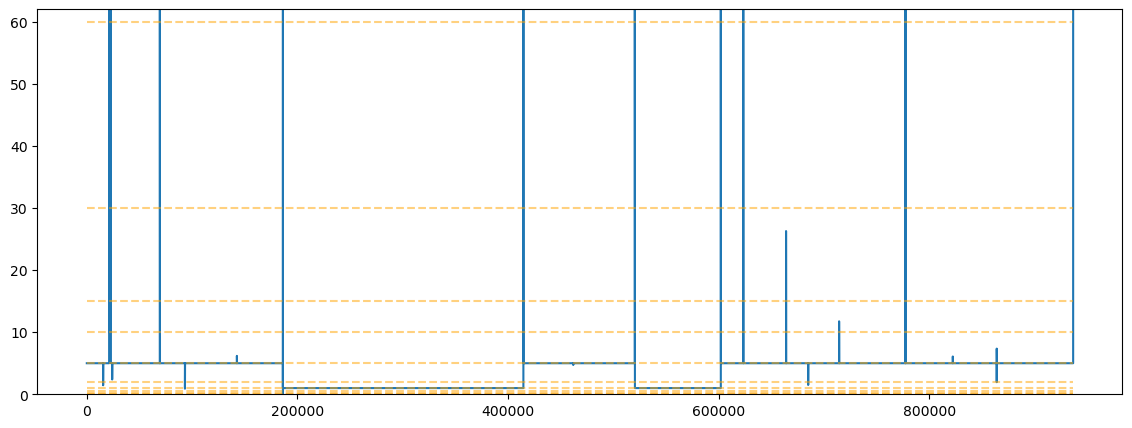

Top 5 modes and their frequencies: [(5.0, 624978), (1.0, 309987), (10.0, 1591)]
[5.0, 1.0, 10.0]


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_72428/244330278.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creeping_B.dropna(inplace=True)


this is the sampling rate of C 1.0
[5.0, 10.0, 1.0] ['A', 'B', 'C']
EASH_5.0mins


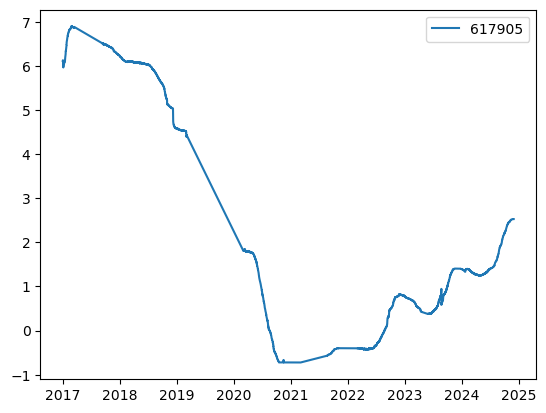

EASH_10.0mins


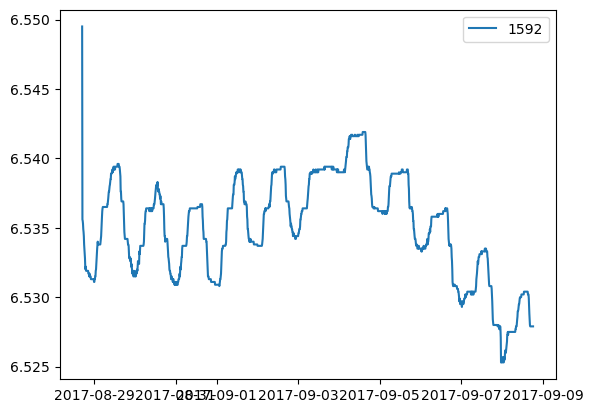

EASH_1.0mins


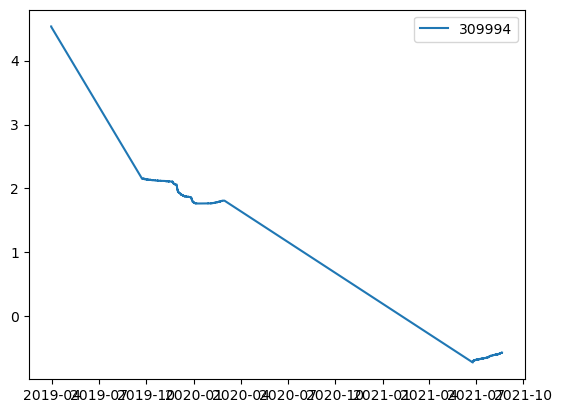

HDF5 structure
Group: /
Group: /EASH_1.0mins/
  Dataset: Slip_EASH_1.0mins, Shape: (309994,), Dtype: float64
  Dataset: Time_EASH_1.0mins, Shape: (309994,), Dtype: object
Group: /EASH_10.0mins/
  Dataset: Slip_EASH_10.0mins, Shape: (1592,), Dtype: float64
  Dataset: Time_EASH_10.0mins, Shape: (1592,), Dtype: object
Group: /EASH_5.0mins/
  Dataset: Slip_EASH_5.0mins, Shape: (617905,), Dtype: float64
  Dataset: Time_EASH_5.0mins, Shape: (617905,), Dtype: object
Creepmeter_meta_data
    Network   Creepmeter_full_name Creepmeter_abbrv File_code  \
0       EAF             Balikburnu             BAL1      BAL1   
1      PARK             Highway 46             C461      C461   
2      PARK             Highway 46             C462      C462   
3       UTA            Canyonlands             CAN1      CAN1   
4       NAF                 Cerkes             CER1      CER1   
..      ...                    ...              ...       ...   
111   SOCAL              Yuha West             COLW      COL

In [ ]:
import importlib
importlib.reload(c2h)
try:
    del creeping_A
except NameError:
    dummy=10

try:
    del creeping_B
except NameError:
    dummy=10
try:
    del creeping_C
except NameError:
    dummy=10

try:
    del creeping_D
except NameError:
    dummy=10


sac_vs_hdf5='hdf5'
Creepmeter_dataframe_SAC = pd.DataFrame()
for file in files:
    # Extract the first 4 letters in uppercase
    abbreviation = file[:4].upper()
    print(abbreviation)
    try:
        fn = '{k}'.format(k=abbreviation)
        prefix = 'Slip'
        index_CM = np.where(creepmeter_metadata['Creepmeter_abbrv']==abbreviation)[0][0]
        full_name = creepmeter_metadata['Creepmeter_full_name'].iloc[index_CM]
        latitude = creepmeter_metadata['Latitude'].iloc[index_CM]
        longitude = creepmeter_metadata['Longitude'].iloc[index_CM]
        depth = creepmeter_metadata['Depth'].iloc[index_CM]
        length = creepmeter_metadata['Length'].iloc[index_CM]
        obliquity = creepmeter_metadata['Obliquity'].iloc[index_CM]
        network = creepmeter_metadata['Network'].iloc[index_CM]
        full_name = creepmeter_metadata['Creepmeter_full_name'].iloc[index_CM]
        print('metadata imported')
        hdf5_path = '../../Data/DATA_tidied/HDF5/' + fn +'.h5'
        sac_path = '../../Data/DATA_tidied/SAC/' + fn +'.SAC'

        if sac_vs_hdf5 == 'hdf5':
            path = hdf5_path
        elif sac_vs_hdf5 == 'sac':
            path=sac_path
        print(path)
        if not os.path.isfile(path):
            data = pd.read_csv(directory + file,index_col=0)
            try:
                data['Time'] = pd.to_datetime(data['Time'])
            except KeyError:
                data['Time'] = pd.to_datetime(data['Date'])


            tm_diff = np.diff(data['Time'])/ np.timedelta64(1, 'm')
            tm_diff = np.append(tm_diff,123456)
            #tm_diff = c2h.round_to_nearest_half(tm_diff)
            data['tm_diff'] = tm_diff
            data.dropna(inplace=True)
            #data['tm_diff'] = c2h.round_to_nearest_half(data['tm_diff'])
            data.reset_index(inplace=True,drop=True)
            print(data)

            boolarr = tm_diff <1/60
            same_time = tm_diff[boolarr] 

            if len(same_time) >0:
                datapoint_to_drop = np.where(tm_diff <1/60)[0][0]
                data.drop(datapoint_to_drop,inplace=True)
                data.reset_index(inplace=True)
                data.drop(['index'],axis=1,inplace=True)
                boolarr_diff = tm_diff >= 1/60
                tm_diff = tm_diff[boolarr_diff]
            data.drop(data.loc[data.Time.isnull()].index,inplace=True)
            #data.dropna(inplace=True)
            data.reset_index(inplace=True,drop=True) 
            data['Slip'] = data['Slip'].astype(float)

            plt.figure(figsize=(14,5))
            ax = plt.subplot(1,1,1)
            plt.plot(tm_diff)
            plt.ylim(0,62)
            plt.hlines([1/60,1/6,1/2,1,2,5,10,15,30,60],xmin=0,xmax=len(tm_diff),colors='orange',linestyles='--',alpha=0.5)
            plt.show()

            allowed_modes = [1/60,1/6,1/2,1,2,5,10,15,30,60]
            top_4_modes = c2h.find_top_modes(tm_diff, 5,allowed_modes)
            print("Top 5 modes and their frequencies:", top_4_modes)
            no_mode = input('how many sampling frequencies?')
            reversal = input('does the smaple rate revert to an earlier one? (y/n)')
            periods = []
            for q in range(int(no_mode)):
                periods.append(top_4_modes[q][0])
            print(periods)

            
            if abbreviation =='SC30':
                creeping_A = data.iloc[:89113]
                creeping_B = data.iloc[89113:398603]
                creeping_C = data.iloc[398603:578245]#413792]
                #creeping_D = data.iloc[413792:415271]
                #creeping_C_2 = data.iloc[415271:578245]
                #creeping_C = pd.concat([creeping_C,creeping_C_2],ignore_index=True)
                creeping_E = data.iloc[578245:]
                #del creeping_C_2 

                plt.figure()
                plt.plot(pd.to_datetime(creeping_A['Date']),creeping_A['Slip'])
                plt.plot(pd.to_datetime(creeping_B['Date']),creeping_B['Slip'])
                plt.plot(pd.to_datetime(creeping_C['Date']),creeping_C['Slip'])
                #plt.plot(pd.to_datetime(creeping_D['Date']),creeping_D['Slip'])
                plt.plot(pd.to_datetime(creeping_E['Date']),creeping_E['Slip'])
                plt.show()

            if len(periods)==4:
                pairs = [(periods[i], periods[j]) for i in range(4) for j in range(i + 1, 4)]
                indices = []
                
                # Calculate indices based on transformations for each pair
                for k, g in pairs:
                    idx1 = eval('c2h.{k}_to_{g}(tm_diff)'.format(k=c2h.stringify(k), g=c2h.stringify(g)))
                    idx2 = eval('c2h.{k}_to_{g}(tm_diff)'.format(k=c2h.stringify(g), g=c2h.stringify(k)))
                    indices.extend([idx1, idx2])
                
                # Sort and get the unique indices, which serve as the transition points
                indices = sorted(indices)
                print(indices)
                unique_ind = np.unique(indices)
                print("Unique Indices:", unique_ind)


                if abbreviation == 'DU30':
                    T10_to_5  =115226
                    T5_to_10 = 435982
                    T10_to_1 = 460833
                    T1_to_5 = 460860
                    T5_to_30 = 1187431
                    T30_to_1 = 1230931
                                    
                    creeping_A = data.iloc[:T10_to_5]
                    creeping_B = data.loc[T10_to_5:T5_to_10] 
                    creeping_A_2 = data.iloc[T5_to_10:T10_to_1]
                    creeping_C = data.iloc[T10_to_1:T1_to_5]
                    creeping_B_2 = data.iloc[T1_to_5:T5_to_30]
                    creeping_D = data.iloc[T5_to_30:T30_to_1]
                    creeping_C_2 = data.iloc[T30_to_1:]

                    creeping_A = pd.concat([creeping_A,creeping_A_2],ignore_index=True)
                    creeping_B = pd.concat([creeping_B,creeping_B_2],ignore_index=True)
                    creeping_C = pd.concat([creeping_C,creeping_C_2],ignore_index=True)
                    del creeping_A_2,creeping_B_2,creeping_C_2 
                       # From start to 'a' (exclusive)
                elif abbreviation == 'FE30':
                    a = unique_ind[1]
                    creeping_A = data.iloc[:a]
                    the_rest = data.iloc[a:]
                    the_rest.reset_index(inplace=True,drop=True)
                    for k, g in pairs:
                        idx1 = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k=c2h.stringify(k), g=c2h.stringify(g)))
                        idx2 = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k=c2h.stringify(g), g=c2h.stringify(k)))
                        indices.extend([idx1, idx2])
                
                    # Sort and get the unique indices, which serve as the transition points
                    indices = sorted(indices)
                    print(indices)
                    unique_ind = np.unique(indices)
                    print("Unique Indices:", unique_ind)
                    b = unique_ind[1]
                    creeping_B = the_rest.iloc[:b]
                    creeping_A_2 = the_rest.iloc[b:unique_ind[2]]
                    creeping_C = the_rest.iloc[unique_ind[2]:unique_ind[5]]
                    creeping_D = the_rest.iloc[unique_ind[5]:]
                    creeping_A = pd.concat([creeping_A,creeping_A_2],ignore_index=True)
                elif abbreviation =='RR45':
                    T30_to_10 = 57478
                    T10_to_5 = 190438
                    T5_to_1 = 391170

                    creeping_A = data.iloc[:T30_to_10]
                    creeping_B = data.loc[T30_to_10:T10_to_5] 
                    creeping_C = data.iloc[T10_to_5+1:T5_to_1]
                    creeping_D = data.iloc[T5_to_1:]
                elif abbreviation == 'SU30':
                    T2_to_5 = 16666
                    T5_to_10 = 231349
                    T10_to_15 = 308074
                    T15_to_30 = 359677
                    T30_to_5 = 503020
                    T5_to_1 = 584077

                    creeping_A = data.iloc[:T2_to_5]
                    creeping_B = data.loc[T2_to_5:T5_to_10] 
                    creeping_C = data.iloc[T5_to_10:T10_to_15]
                    creeping_D = data.iloc[T10_to_15:T15_to_30]
                    creeping_B_2 = data.iloc[T15_to_30:T30_to_5]
                    creeping_E = data.iloc[T5_to_1:]
                    creeping_B = pd.concat([creeping_B,creeping_B_2],ignore_index=True)
                elif abbreviation == 'NS45':
                    T30_to_5 = unique_ind[1]
                    T5_to_10  = unique_ind[2]
                    T10_to_1 = unique_ind[3]
                    creeping_A = data.iloc[:T30_to_5]
                    creeping_B = data.iloc[T30_to_5:T5_to_10]
                    creeping_C = data.iloc[T5_to_10:T10_to_1]
                    creeping_D = data.iloc[T10_to_1:]

                    
                
                print(creeping_A)
                print(creeping_B)
                print(creeping_C)
                print(creeping_D)

            elif len(periods)==3:

                if abbreviation=='EASH':
                    creeping_A = data.iloc[:21200]
                    creeping_B = data.iloc[21200:22792]
                    creeping_A_2 = data.iloc[22792:186233]
                    creeping_C  = data.iloc[186233:414563]
                    creeping_A_3 = data.iloc[414563:520366]
                    creeping_C_2 = data.iloc[520366:602030]
                    creeping_A_4 = data.iloc[602030:]
                    creeping_A = pd.concat([creeping_A,creeping_A_2,creeping_A_3,creeping_A_4],ignore_index=True)
                    creeping_C = pd.concat([creeping_C,creeping_C_2],ignore_index=True)

                    creeping_A.dropna(inplace=True)
                    creeping_B.dropna(inplace=True)
                    creeping_C.dropna(inplace=True)
                    creeping_A.reset_index(inplace=True,drop=True)
                    creeping_B.reset_index(inplace=True,drop=True)
                    creeping_C.reset_index(inplace=True,drop=True)
                else:

                    a = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[0]), g = c2h.stringify(periods[1])))
                    b = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[1]), g = c2h.stringify(periods[0])))
                    c = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[0]), g = c2h.stringify(periods[2])))
                    d = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[2]), g = c2h.stringify(periods[0])))
                    e = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[1]), g = c2h.stringify(periods[2])))
                    f = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[2]), g = c2h.stringify(periods[1])))

                    indices = sorted([a,b,c,d,e,f])
                    unique_ind = np.unique(indices)
                    print(unique_ind)
                    creeping_A = data.iloc[:unique_ind[1]]      # From start to 'a' (exclusive)
                    the_rest = data.iloc[unique_ind[1]:]

                    if reversal == 'y':
                        the_rest.reset_index(inplace=True,drop=True)
                        a = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[0]), g = c2h.stringify(periods[1])))
                        b = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[1]), g = c2h.stringify(periods[0])))
                        c = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[0]), g = c2h.stringify(periods[2])))
                        d = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[2]), g = c2h.stringify(periods[0])))
                        e = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[1]), g = c2h.stringify(periods[2])))
                        f = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[2]), g = c2h.stringify(periods[1])))
                        indices = sorted([a,b,c,d,e,f])
                        unique_ind = np.unique(indices)

                        print(unique_ind)
                        if abbreviation == 'CHE1':
                            a = 87593
                            b = 617992
                        
                        indices = np.unique([a,b])
                        print(indices)

                        creeping_B = the_rest.iloc[:indices[0]]
                        creeping_D = the_rest.iloc[indices[0]:indices[1]]
                        creeping_C = the_rest.iloc[indices[1]:]
                        creeping_A = pd.concat([creeping_A,creeping_D],ignore_index=True)
                        creeping_B.reset_index(inplace=True,drop=True)
                        creeping_C.reset_index(inplace=True,drop=True)
                        del creeping_D




                    else:
                        creeping_B = data.iloc[unique_ind[1]:unique_ind[2]]    # From 'a' (inclusive) to 'b' (exclusive)
                        creeping_C = data.iloc[unique_ind[2]:]     # From 'b' (inclusive) to 'c' (exclusive)
                        
                        creeping_A.reset_index(inplace=True,drop=True)
                        creeping_B.reset_index(inplace=True,drop=True)
                        creeping_C.reset_index(inplace=True,drop=True)
                    
                    print(creeping_A)
                    print(creeping_B)
                    print(creeping_C)


            elif len(periods) ==2:
                if abbreviation == 'SH30':
                    T5_to_1a = 179139
                    T1_to_5a = 407469
                    T5_to_1b = 513272
                    T1_to_5b = 594936

                    creeping_A = data.iloc[:T5_to_1a]
                    creeping_B = data.iloc[T5_to_1a:T1_to_5a]
                    creeping_A_2 = data.iloc[T1_to_5a:T5_to_1b]
                    creeping_B_2 = data.iloc[T5_to_1b:T1_to_5b]
                    creeping_A_3 = data.iloc[T1_to_5b:]

                    creeping_A = pd.concat([creeping_A,creeping_A_2],ignore_index=True)
                    creeping_A = pd.concat([creeping_A,creeping_A_3],ignore_index=True)
                    creeping_B = pd.concat([creeping_B,creeping_B_2],ignore_index=True)
                else:
                    a = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[0]), g = c2h.stringify(periods[1])))
                    b = eval('c2h.{k}_to_{g}(tm_diff)'.format(k = c2h.stringify(periods[1]), g = c2h.stringify(periods[0])))

                    indices = sorted([a,b])
                    unique_ind = np.unique(indices)
                    creeping_A = data.iloc[:unique_ind[1]]
                    the_rest = data.iloc[unique_ind[1]:]
                    
                    if reversal == 'y':
                        the_rest.reset_index(inplace=True,drop=True)
                        a = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[0]), g = c2h.stringify(periods[1])))
                        b = eval('c2h.{k}_to_{g}(the_rest["tm_diff"])'.format(k = c2h.stringify(periods[1]), g = c2h.stringify(periods[0])))
                        print(a,b)
                        if abbreviation == 'R7' or abbreviation == 'RB':
                            a = 17179
                        indices = np.unique([a,b])
                        print(indices)

                        creeping_B = the_rest.iloc[indices[0]:indices[1]]
                        creeping_C  = the_rest.iloc[indices[1]:]
                        
                        creeping_A = pd.concat([creeping_A,creeping_C],ignore_index=True)
                        creeping_B.reset_index(inplace=True,drop=True)
                        del creeping_C

                    else:
                        creeping_B = data.iloc[unique_ind[1]:]
                        creeping_A.reset_index(inplace=True,drop=True)
                        creeping_B.reset_index(inplace=True,drop=True)

                print(creeping_A)
                print(creeping_B)

            elif len(periods) == 1:
                creeping_A = data.iloc[:]
                print(creeping_A)
            
            
            Number_of_splits = []
            Sampling_rates_variable = []
            try:
                sampling_A = c2h.find_top_modes(creeping_A['tm_diff'],1,allowed_modes)[0][0]
                Sampling_rates_variable.append(sampling_A)
                Number_of_splits.append('A')
            except (IndexError, NameError, KeyError):
                sampling_A = 0

            try:
                sampling_B = c2h.find_top_modes(creeping_B['tm_diff'],1,allowed_modes)[0][0]
                Sampling_rates_variable.append(sampling_B)
                Number_of_splits.append('B')
            except (IndexError, NameError, KeyError):
                sampling_B = 0

            try:
                sampling_C = c2h.find_top_modes(creeping_C['tm_diff'],1,allowed_modes)[0][0]
                print('this is the sampling rate of C',sampling_C)
                Sampling_rates_variable.append(sampling_C)
                Number_of_splits.append('C')
            except (IndexError, NameError, KeyError):
                sampling_C = 0

            try:
                sampling_D = c2h.find_top_modes(creeping_D['tm_diff'],1,allowed_modes)[0][0]
                Sampling_rates_variable.append(sampling_D)
                Number_of_splits.append('D')
            except (IndexError, NameError, KeyError):
                sampling_D = 0

            try:
                sampling_E = c2h.find_top_modes(creeping_E['tm_diff'],1,allowed_modes)[0][0]
                Sampling_rates_variable.append(sampling_E)
                Number_of_splits.append('E')
            except (IndexError, NameError, KeyError):
                sampling_E = 0

            print(Sampling_rates_variable,Number_of_splits)

            
            

            with h5py.File(path, 'w') as f:
                f.attrs['author'] = 'Daniel B. Gittins'
                f.attrs['network'] = network
                f.attrs['latitude'] = latitude
                f.attrs['longitude'] = longitude
                f.attrs['depth'] = depth
                f.attrs['length'] = length
                f.attrs['obliquity'] = obliquity
                # Create a group to store both waves together
                for i in range(len(Number_of_splits)):
                    smpl_rate = Sampling_rates_variable[i]
                    group_name = fn+'_{k}mins'.format(k=smpl_rate)
                    print(group_name)
                    time_data = eval('creeping_{k}.Time'.format(k=Number_of_splits[i]))
                    # Assuming 'data['Time']' is your pandas Series of datetime objects
                    datetime_strings = time_data.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()

                    dependent_data = eval('creeping_{k}.Slip'.format(k=Number_of_splits[i])).tolist()
                    plt.figure()
                    plt.plot(time_data,dependent_data,label=len(dependent_data))
                    plt.legend()
                    plt.show()
                    group = f.create_group(group_name)
                    # Create datasets for time and dependent variable in the group
                    group.create_dataset('Time_{p}_{k}mins'.format(p=abbreviation,k=smpl_rate), data=datetime_strings)
                    group.create_dataset('Slip_{p}_{k}mins'.format(p=abbreviation,k=smpl_rate), data=dependent_data)
                
                    
                    # Store metadata about the dependent variable
                    if Sampling_rates_variable[i] >=1:
                        description = f"Slip for {abbreviation} at {smpl_rate} minute sampling"
                    else:
                        description = f"Slip for {abbreviation} at {smpl_rate*60} second sampling"
                    group.attrs['description'] = description

                    
                    # Optional: Store additional metadata (e.g., units, sampling rate)
                    starttime = eval('creeping_{k}.Time.iloc[0]'.format(k=Number_of_splits[i]))
                    endtime = eval('creeping_{k}.Time.iloc[-1]'.format(k=Number_of_splits[i]))
                    group.attrs['sampling_rate'] = Sampling_rates_variable[i]  # Example: 100 Hz sampling rate (10 ms interval)
                    group.attrs['time_units'] = 'minutes'     # Time units
                    group.attrs['slip_units'] = 'millimetres'  # Dependent variable units (e.g., for slip)
                    group.attrs['channel'] = 'slip'
                    group.attrs['starttime'] = starttime.strftime('%Y-%m-%d %H:%M:%S')
                    group.attrs['delta'] = 60*Sampling_rates_variable[i]
                    instrument = pd.DataFrame({'Network':[network],'Creepmeter_full_name':[full_name],'Creepmeter_abbrv':[abbreviation],'File_code':[fn],
                                            'Start Time':[starttime],'End Time':[endtime],'Sampling rate, mins':[smpl_rate],
                                            'Latitude':[latitude],'Longitude':[longitude],'Description':[description],'Depth':[depth],'Length':[length],
                                            'Obliquity':[obliquity],'group_name':group_name})
                    Creepmeter_dataframe = pd.concat([Creepmeter_dataframe,instrument],ignore_index=True)
                try:
                    del creeping_A
                except NameError:
                    dummy=10

                try:
                    del creeping_B
                except NameError:
                    dummy=10
                try:
                    del creeping_C
                except NameError:
                    dummy=10

                try:
                    del creeping_D
                except NameError:
                    dummy=10


                print('HDF5 structure')
                c2h.print_hdf5_structure('../../Data/DATA_tidied/HDF5/' + fn +'.h5')
                Creepmeter_dataframe.drop_duplicates(inplace=True)
                Creepmeter_dataframe.reset_index(inplace=True,drop=True)
                Creepmeter_dataframe.to_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation.csv')
                print('Creepmeter_meta_data')
                print(Creepmeter_dataframe)
    except IndexError:
        dummy=10




In [80]:
data.iloc[520366:602032]

,Date,Slip,Time,tm_diff
520366,2021-06-24 22:13:15,-0.7233,2021-06-24 22:13:15,1.000000
520367,2021-06-24 22:14:15,-0.7230,2021-06-24 22:14:15,1.000000
520368,2021-06-24 22:15:15,-0.7230,2021-06-24 22:15:15,1.000000
520369,2021-06-24 22:16:15,-0.7230,2021-06-24 22:16:15,1.000000
520370,2021-06-24 22:17:15,-0.7230,2021-06-24 22:17:15,1.000000
...,...,...,...,...
602027,2021-08-20 15:14:15,-0.5721,2021-08-20 15:14:15,1.000000
602028,2021-08-20 15:15:15,-0.5703,2021-08-20 15:15:15,1.000000
602029,2021-08-20 15:16:15,-0.5703,2021-08-20 15:16:15,282.133333
602030,2021-08-20 19:58:23,-0.5717,2021-08-20 19:58:23,5.000000


In [ ]:
T10_to_5  =115226
T5_to_10 = 435982
T10_to_1 = 460833
T1_to_5 = 460860
T5_to_30 = 1187431
T30_to_1 = 1230931

In [ ]:
np.where(tm_diff==2)

Adding Temperature

In [30]:
Temp = pd.read_csv('../../Data/DATA_tidied/CSV/Temperature/East_Shoreline_Temp.csv',index_col=0)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_72428/775592160.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Temp = pd.read_csv('../../Data/DATA_tidied/CSV/Temperature/East_Shoreline_Temp.csv',index_col=0)


In [31]:
Temp['Date'] = pd.to_datetime(Temp['Date'])

In [32]:
Temp

,Date,degC
0,2016-12-30 19:47:39,16.19
1,2016-12-30 19:52:39,16.345
2,2016-12-30 19:57:39,16.344
3,2016-12-30 20:02:39,16.323
4,2016-12-30 20:07:39,16.308
...,...,...
936580,2024-11-27 19:14:56,22.135
936581,2024-11-27 19:19:56,22.132
936582,2024-11-27 19:24:56,22.129
936583,2024-11-27 19:29:56,22.126


In [33]:
abbreviation = 'EASH'

In [34]:
if abbreviation == 'SH30':
    T5_to_1a = 179139
    T1_to_5a = 407469
    T5_to_1b = 513272
    T1_to_5b = 594936

    creeping_A = Temp.iloc[:T5_to_1a]
    creeping_B = Temp.iloc[T5_to_1a:T1_to_5a]
    creeping_A_2 = Temp.iloc[T1_to_5a:T5_to_1b]
    creeping_B_2 = Temp.iloc[T5_to_1b:T1_to_5b]
    creeping_A_3 = Temp.iloc[T1_to_5b:]

    creeping_A = pd.concat([creeping_A,creeping_A_2],ignore_index=True)
    creeping_A = pd.concat([creeping_A,creeping_A_3],ignore_index=True)
    creeping_B = pd.concat([creeping_B,creeping_B_2],ignore_index=True)
    # 5 min sampling
    time_data_A = creeping_A['Date']
    datetime_strings = time_data_A.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
    dependent_data = creeping_A['degC'].tolist()

    hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
    with h5py.File(hdf5_path, 'a') as f:
        del f['Temperature']

        group = f.create_group('Temperature_5T')
        # Create datasets for time and dependent variable in the group
        group.create_dataset('Time_{p}_5_mins'.format(p=abbreviation), data=datetime_strings)
        group.create_dataset('Temperature_{p}_5_mins'.format(p=abbreviation), data=np.array(dependent_data, dtype=np.float64))
        group.attrs['Units'] = 'Celsius'
        group.attrs['Start date'] = datetime_strings[0]
        group.attrs['End date'] = datetime_strings[-1]

    # 1 min sampling
    time_data_B = creeping_B['Date']
    datetime_strings = time_data_B.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
    dependent_data = creeping_B['degC'].tolist()

    hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
    with h5py.File(hdf5_path, 'a') as f:
        #del f['Orthogonal_1T']
        group = f.create_group('Temperature_1T')
        # Create datasets for time and dependent variable in the group
        group.create_dataset('Time_{p}_1_mins'.format(p=abbreviation), data=datetime_strings)
        group.create_dataset('Temperature_{p}_1_mins'.format(p=abbreviation), data=np.array(dependent_data, dtype=np.float64))
        group.attrs['Units'] = 'Celsius'
        group.attrs['Start date'] = datetime_strings[0]
        group.attrs['End date'] = datetime_strings[-1]



else:
    time_data = Temp['Date']
    datetime_strings = time_data.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
    dependent_data = Temp['degC'].tolist()
    hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
    with h5py.File(hdf5_path, 'a') as f:
        #del f['Temperature']
        group = f.create_group('Temperature')
        # Create datasets for time and dependent variable in the group
        group.create_dataset('Time_{p}'.format(p=abbreviation), data=datetime_strings)
        group.create_dataset('Temperature_{p}'.format(p=abbreviation), data=np.array(dependent_data, dtype=np.float64))
        group.attrs['Units'] = 'Celsius'
print('HDF5 structure')
c2h.print_hdf5_structure(hdf5_path)

HDF5 structure
Group: /
Group: /EASH_1.0mins/
  Dataset: Slip_EASH_1.0mins, Shape: (309994,), Dtype: float64
  Dataset: Time_EASH_1.0mins, Shape: (309994,), Dtype: object
Group: /EASH_10.0mins/
  Dataset: Slip_EASH_10.0mins, Shape: (1592,), Dtype: float64
  Dataset: Time_EASH_10.0mins, Shape: (1592,), Dtype: object
Group: /EASH_5.0mins/
  Dataset: Slip_EASH_5.0mins, Shape: (617905,), Dtype: float64
  Dataset: Time_EASH_5.0mins, Shape: (617905,), Dtype: object
Group: /Temperature/
  Dataset: Temperature_EASH, Shape: (936585,), Dtype: float64
  Dataset: Time_EASH, Shape: (936585,), Dtype: object


Daily

In [ ]:
Daily = pd.read_csv('../../Data/DATA_tidied/CSV/Daily/xva1_day.csv',index_col=0)
Daily

In [ ]:
abbreviation = 'XVA1'

In [ ]:
datetime_strings = Daily['Time'].tolist()
dependent_data = Daily['Slip'].tolist()
hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
with h5py.File(hdf5_path, 'a') as f:
    #del f['Daily measurements']
    group = f.create_group('Daily_measurements')
    # Create datasets for time and dependent variable in the group
    group.create_dataset('Time_{p}_daily'.format(p=abbreviation), data=datetime_strings)
    group.create_dataset('Slip_{p}_daily'.format(p=abbreviation), data=dependent_data)
    group.attrs['Units_slip'] =  'millimetres'
    group.attrs['Start date'] = datetime_strings[0]
    group.attrs['End date'] = datetime_strings[-1]
print('HDF5 structure')
c2h.print_hdf5_structure(hdf5_path)

Manual

In [ ]:
Manual = pd.read_csv('../../Data/DATA_tidied/CSV/Manual/bit1_man.csv',index_col=0)
Manual

In [ ]:
abbreviation = 'BIT1'

In [ ]:
datetime_strings = Manual['Time'].tolist()
dependent_data = Manual['Slip'].tolist()
hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
with h5py.File(hdf5_path, 'a') as f:
    del f['Manual_measurements']
    group = f.create_group('Manual_measurements')
    # Create datasets for time and dependent variable in the group
    group.create_dataset('Time_{p}_Manual'.format(p=abbreviation), data=datetime_strings)
    group.create_dataset('Slip_{p}_Manual'.format(p=abbreviation), data=dependent_data)
    group.attrs['Units_slip'] =  'millimetres'
    group.attrs['Start date'] = datetime_strings[0]
    group.attrs['End date'] = datetime_strings[-1]
print('HDF5 structure')
c2h.print_hdf5_structure(hdf5_path)

Normal

In [36]:
norm = pd.read_csv('../../Data/DATA_tidied/CSV/Orthogonal/East_Shoreline_Oblique.csv',index_col=0)
norm['Date'] = pd.to_datetime(norm['Date'])
norm

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_72428/3499843661.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  norm = pd.read_csv('../../Data/DATA_tidied/CSV/Orthogonal/East_Shoreline_Oblique.csv',index_col=0)


,Date,Slip
0,2016-12-30 19:47:39,3.4309
1,2016-12-30 19:52:39,3.4303
2,2016-12-30 19:57:39,3.4303
3,2016-12-30 20:02:39,3.4303
4,2016-12-30 20:07:39,3.4303
...,...,...
936580,2024-11-27 19:14:56,6.0546
936581,2024-11-27 19:19:56,6.0544
936582,2024-11-27 19:24:56,6.0546
936583,2024-11-27 19:29:56,6.0546


In [37]:
abbreviation = 'EASH'

In [43]:
time_data = norm['Date']
datetime_strings = time_data.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
dependent_data = norm['Slip'].astype(float).to_list()
dependent_data = dependent_data
hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
with h5py.File(hdf5_path, 'a') as f:
    del f['Normal']
    group = f.create_group('Normal')
    # Create datasets for time and dependent variable in the group
    group.create_dataset('Time_{p}_Normal'.format(p=abbreviation), data=datetime_strings)
    group.create_dataset('Slip_{p}_Normal'.format(p=abbreviation), data=dependent_data)
    group.attrs['Units_slip'] =  'millimetres'
    group.attrs['Start date'] = datetime_strings[0]
    group.attrs['End date'] = datetime_strings[-1]
print('HDF5 structure')
c2h.print_hdf5_structure(hdf5_path)

HDF5 structure
Group: /
Group: /EASH_1.0mins/
  Dataset: Slip_EASH_1.0mins, Shape: (309994,), Dtype: float64
  Dataset: Time_EASH_1.0mins, Shape: (309994,), Dtype: object
Group: /EASH_10.0mins/
  Dataset: Slip_EASH_10.0mins, Shape: (1592,), Dtype: float64
  Dataset: Time_EASH_10.0mins, Shape: (1592,), Dtype: object
Group: /EASH_5.0mins/
  Dataset: Slip_EASH_5.0mins, Shape: (617905,), Dtype: float64
  Dataset: Time_EASH_5.0mins, Shape: (617905,), Dtype: object
Group: /Normal/
  Dataset: Slip_EASH_Normal, Shape: (936585,), Dtype: float64
  Dataset: Time_EASH_Normal, Shape: (936585,), Dtype: object
Group: /Temperature/
  Dataset: Temperature_EASH, Shape: (936585,), Dtype: float64
  Dataset: Time_EASH, Shape: (936585,), Dtype: object


In [41]:
dependent_data

['3.4309',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4305',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4305',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4305',
 '3.4303',
 '3.4303',
 '3.4301',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4303',
 '3.4301',
 '3.4303',
 '3.4303',
 '3.4301',
 '3.4301',
 '3.4303',
 '3.4301',
 '3.4301',
 '3.4303',
 '3.4301',

Orthogonal

In [11]:
Ortho = pd.read_csv('../../Data/DATA_tidied/CSV/Orthogonal/SaltCreek_Orthogonal.csv',index_col=0)
Ortho['Date'] = pd.to_datetime(Ortho['Date'])
tm_diff = np.diff(Ortho['Date'])/ np.timedelta64(1, 'm')
Ortho['diff'] = np.append(tm_diff,123456)
Ortho

,Date,Ortho,diff
0,2016-12-24 20:54:16,3.31530,5.0
1,2016-12-24 20:59:16,3.29700,5.0
2,2016-12-24 21:04:16,3.29280,5.0
3,2016-12-24 21:09:16,3.29260,5.0
4,2016-12-24 21:14:16,3.29260,5.0
...,...,...,...
2155686,2025-01-30 03:51:00,6.95197,1.0
2155687,2025-01-30 03:52:00,6.95197,1.0
2155688,2025-01-30 03:53:00,6.95197,1.0
2155689,2025-01-30 03:54:00,6.95197,1.0


In [12]:
abbreviation = 'SC30'

In [13]:
if abbreviation == 'SH30':
    T5_to_1a = 179139
    T1_to_5a = 407469
    T5_to_1b = 513272
    T1_to_5b = 594936

    creeping_A = Ortho.iloc[:T5_to_1a]
    creeping_B = Ortho.iloc[T5_to_1a:T1_to_5a]
    creeping_A_2 = Ortho.iloc[T1_to_5a:T5_to_1b]
    creeping_B_2 = Ortho.iloc[T5_to_1b:T1_to_5b]
    creeping_A_3 = Ortho.iloc[T1_to_5b:]

    creeping_A = pd.concat([creeping_A,creeping_A_2],ignore_index=True)
    creeping_A = pd.concat([creeping_A,creeping_A_3],ignore_index=True)
    creeping_B = pd.concat([creeping_B,creeping_B_2],ignore_index=True)
    # 5 min sampling
    time_data_A = creeping_A['Date']
    datetime_strings = time_data_A.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
    dependent_data = creeping_A['Ortho'].tolist()
    starttime = time_data_A.iloc[0]

    hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
    with h5py.File(hdf5_path, 'a') as f:
        del f['Orthogonal_5T']
        group = f.create_group('Orthogonal_5T')
        # Create datasets for time and dependent variable in the group
        group.create_dataset('Time_{p}_5_mins_Orthogonal'.format(p=abbreviation), data=datetime_strings)
        group.create_dataset('Slip_{p}_5_mins_Orthogonal'.format(p=abbreviation), data=dependent_data)
        group.attrs['Units_Orthogonal'] =  'millimetres'
        group.attrs['Start date'] = datetime_strings[0]
        group.attrs['End date'] = datetime_strings[-1]
        group.attrs['sampling_rate'] = 5  # Example: 100 Hz sampling rate (10 ms interval)
        group.attrs['time_units'] = 'minutes'     # Time units
        group.attrs['slip_units'] = 'millimetres'  # Dependent variable units (e.g., for slip)
        group.attrs['channel'] = 'ortho'
        group.attrs['starttime'] = starttime.strftime('%Y-%m-%d %H:%M:%S')
        group.attrs['delta'] = 60*5
                        

    # 1 min sampling
    time_data_B = creeping_B['Date']
    datetime_strings = time_data_B.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
    dependent_data = creeping_B['Ortho'].tolist()

    hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
    with h5py.File(hdf5_path, 'a') as f:
        del f['Orthogonal_1T']
        group = f.create_group('Orthogonal_1T')
        # Create datasets for time and dependent variable in the group
        group.create_dataset('Time_{p}_1_mins_Orthogonal'.format(p=abbreviation), data=datetime_strings)
        group.create_dataset('Slip_{p}_1_mins_Orthogonal'.format(p=abbreviation), data=dependent_data)
        group.attrs['Units_Orthogonal'] =  'millimetres'
        group.attrs['Start date'] = datetime_strings[0]
        group.attrs['End date'] = datetime_strings[-1]
        group.attrs['sampling_rate'] = 1  # Example: 100 Hz sampling rate (10 ms interval)
        group.attrs['time_units'] = 'minutes'     # Time units
        group.attrs['slip_units'] = 'millimetres'  # Dependent variable units (e.g., for slip)
        group.attrs['channel'] = 'ortho'
        group.attrs['starttime'] = starttime.strftime('%Y-%m-%d %H:%M:%S')
        group.attrs['delta'] = 60*1

In [14]:
time_data = Ortho['Date']
datetime_strings = time_data.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
dependent_data = Ortho['Ortho'].tolist()
hdf5_path = '../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=abbreviation)
with h5py.File(hdf5_path, 'a') as f:
    #del f['Orthogonal']
    group = f.create_group('Orthogonal')
    # Create datasets for time and dependent variable in the group
    group.create_dataset('Time_{p}_Orthogonal'.format(p=abbreviation), data=datetime_strings)
    group.create_dataset('Slip_{p}_Orthogonal'.format(p=abbreviation), data=dependent_data)
    group.attrs['Units_Orthogonal'] =  'millimetres'
    group.attrs['Start date'] = datetime_strings[0]
    group.attrs['End date'] = datetime_strings[-1]
print('HDF5 structure')
c2h.print_hdf5_structure(hdf5_path)

HDF5 structure
Group: /
Group: /Orthogonal/
  Dataset: Slip_SC30_Orthogonal, Shape: (2155691,), Dtype: float64
  Dataset: Time_SC30_Orthogonal, Shape: (2155691,), Dtype: object
Group: /SC30_1.0mins/
  Dataset: Slip_SC30_1.0mins, Shape: (2171603,), Dtype: float64
  Dataset: Time_SC30_1.0mins, Shape: (2171603,), Dtype: object
Group: /SC30_2.0mins/
  Dataset: Slip_SC30_2.0mins, Shape: (309490,), Dtype: float64
  Dataset: Time_SC30_2.0mins, Shape: (309490,), Dtype: object
Group: /SC30_5.0mins/
  Dataset: Slip_SC30_5.0mins, Shape: (179642,), Dtype: float64
  Dataset: Time_SC30_5.0mins, Shape: (179642,), Dtype: object
Group: /SC30_60.0mins/
  Dataset: Slip_SC30_60.0mins, Shape: (89113,), Dtype: float64
  Dataset: Time_SC30_60.0mins, Shape: (89113,), Dtype: object
Group: /Temperature/
  Dataset: Temperature_SC30, Shape: (2924599,), Dtype: float64
  Dataset: Time_SC30, Shape: (2924599,), Dtype: object


In [ ]:
with h5py.File(hdf5_path, 'r+') as f:
    f.attrs['obliquity'] = 30

In [ ]:
if abbreviation == 'SH30':
    T5_to_1a = 179139
    T1_to_5a = 407469
    T5_to_1b = 513272
    T1_to_5b = 594936

    creeping_A = data.iloc[:T5_to_1a]
    creeping_B = data.iloc[T5_to_1a:T1_to_5a]
    creeping_A_2 = data.iloc[T1_to_5a:T5_to_1b]
    creeping_B_2 = data.iloc[T5_to_1b:T1_to_5b]
    creeping_A_3 = data.iloc[T1_to_5b:]

    creeping_A = pd.concat([creeping_A,creeping_A_2],ignore_index=True)
    creeping_A = pd.concat([creeping_A,creeping_A_3],ignore_index=True)
    creeping_B = pd.concat([creeping_B,creeping_B_2],ignore_index=True)

HDF5 to SAC

In [2]:
import os

folder_path = "../../../Data/DATA_tidied/HDF5/Standardised_creepmeter_data"  # Replace with the actual path to your folder

file_names = []
for entry in os.listdir(folder_path):
    full_path = os.path.join(folder_path, entry)
    if os.path.isfile(full_path):
        file_names.append(entry)

print(file_names)

['CHE1_standardised.h5', 'GD_standardised.h5', 'QW30_standardised.h5', 'HAS1_standardised.h5', 'ORM1_standardised.h5', 'RB_standardised.h5', 'CER1_standardised.h5', 'PET1_standardised.h5', 'R7_standardised.h5', '.DS_Store', 'ISW1_standardised.h5', 'CHA1_standardised.h5', 'WSZ1_standardised.h5', 'RR45_standardised.h5', 'SC30_standardised.h5', 'INW1_standardised.h5', 'YZW1_standardised.h5', 'PAN1_standardised.h5', 'C461_standardised.h5', 'HAM1_standardised.h5', 'GB_standardised.h5', 'SIV1_standardised.h5', 'TAS1_standardised.h5', 'KAR1_standardised.h5', 'NS45_standardised.h5', 'ESZ1_standardised.h5', 'TEP1_standardised.h5', 'COML_standardised.h5', 'COLE_standardised.h5', 'SU30_standardised.h5', 'EASH_standardised.h5', 'DU30_standardised.h5', 'GOK1_standardised.h5', 'BAL1_standardised.h5', 'KIR1_standardised.h5', 'RA_standardised.h5', 'COLW_standardised.h5', 'PAS1_standardised.h5', 'GS_standardised.h5', 'IR30_standardised.h5', 'SEL1_standardised.h5', 'C462_standardised.h5', 'QE30_standard

In [4]:
for i in range(len(file_names)):
    c2h.print_hdf5_structure(folder_path +'/'+ file_names[i])

Group: /
Group: /CHE1_combined/
  Dataset: Slip_mm, Shape: (1266220,), Dtype: float64
  Dataset: Time, Shape: (1266220,), Dtype: |S19
Group: /Temperature/
  Dataset: Temperature_CHE1, Shape: (1266220,), Dtype: float64
  Dataset: Time_CHE1, Shape: (1266220,), Dtype: object
Group: /
Group: /GD_combined/
  Dataset: Slip_mm, Shape: (677888,), Dtype: float64
  Dataset: Time, Shape: (677888,), Dtype: |S19
Group: /
Group: /QW30_combined/
  Dataset: Slip_mm, Shape: (306148,), Dtype: float64
  Dataset: Time, Shape: (306148,), Dtype: |S19
Group: /Temperature/
  Dataset: Temperature_QW30, Shape: (306148,), Dtype: float64
  Dataset: Time_QW30, Shape: (306148,), Dtype: object
Group: /
Group: /HAS1_combined/
  Dataset: Slip_mm, Shape: (241619,), Dtype: float64
  Dataset: Time, Shape: (241619,), Dtype: |S19
Group: /
Group: /ORM1_combined/
  Dataset: Slip_mm, Shape: (313667,), Dtype: float64
  Dataset: Time, Shape: (313667,), Dtype: |S19
Group: /Temperature/
  Dataset: Temperature_ORM1, Shape: (96109,

OSError: Unable to synchronously open file (file signature not found)

Code below is for importing into Igor

In [ ]:
#pragma TextEncoding = "UTF-8"
#pragma rtGlobals=3
#pragma DefaultTab={3,20,4}

// Creates a date/time wave from a date wave stored as text in YYYY-MM-DD format
// and a time wave stored as text in HH:MM:YY format.
// Example:
//      Make/O/T wDateAsText = {"2016-08-15", "2016-08-15"}
//      Make/O/T wTimeAsText = {"19:01:00", "19:01:18"}
//      TextWavesToDateTimeWave(wDateAsText, wTimeAsText, "wDateTime")
//      Edit wDateTime

Function ConvertTextToDateTime(dateTimeAsText)
    String dateTimeAsText       // Assumed in YYYY-MM-DD HH:MM:SS format
    
    Variable dt
    Variable year, month, day
    Variable hour, minute, second

    // Use sscanf to parse the full datetime string
    sscanf dateTimeAsText, "%d-%d-%d %d:%d:%d", year, month, day, hour, minute, second
    
    // Convert the date part to seconds since the epoch
    dt = Date2Secs(year, month, day)
    
    // Calculate the time of day in seconds
    Variable timeOfDay = 3600 * hour + 60 * minute + second
    
    // Add the time of day to the date
    dt += timeOfDay
    
    return dt
End


Function/WAVE TextWavesToDateTimeWave(dateTimeAsTextWave, outputWaveName)
    WAVE/T dateTimeAsTextWave       // Assumed in YYYY-MM-DD HH:MM:SS format
    String outputWaveName

    Variable numPoints = numpnts(dateTimeAsTextWave)
    Make/O/D/N=(numPoints) $outputWaveName
    WAVE wOut = $outputWaveName
    SetScale d, 0, 0, "dat", wOut
   
    Variable i
    for(i=0; i<numPoints; i+=1)
        String dateTimeAsText = dateTimeAsTextWave[i]
        Variable dt = ConvertTextToDateTime(dateTimeAsText)
        wOut[i] = dt   
    endfor 

    return wOut
End